# Heart-disease
Introduction To Dataset
#The business background --- > hospital
#Why you choose this specific dataset to work on? --> classification, health, biology
#Which is the point/question you try to solve? ---->Which factors are the main impact on heart disease?

## 1. Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./heart.csv')

In [3]:
data.head()
#age:  age in years
#sex(1 = male; 0 = female)
#cp: chest pain type
#trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#chol serum cholestoral in mg/dl
#fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg resting electrocardiographic results
#thalach maximum heart rate achieved
#exang exercise induced angina (1 = yes; 0 = no)
#oldpeak ST depression induced by exercise relative to rest
#slope the slope of the peak exercise ST segment
#ca number of major vessels (0-3) colored by flourosopy
#thal 3 = normal; 6 = fixed defect; 7 = reversable defect
#target1 or 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

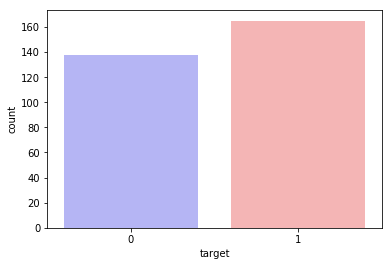

In [8]:
sns.countplot(x = 'target', data = data, palette="bwr")

In [9]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [10]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'target' and X should contain the rest 
# Your code here
X = data.drop(columns = 'target')
y = data['target']


In [11]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=101)


# 2. Build Model

In [12]:
# Random Forest & Decision Tree
# Let's define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
# Your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
model = LogisticRegression()


In [13]:
# Let's fit training data to Random Forest Classifier
rfc.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
# Let's fit training data to Decision Tree Classifier
# Your code here
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
# Let's fit training data to Logistic Regression
# Your code here

model.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
# Let's fit training data to Linear Regression
# Your code here

lm = LinearRegression()
lm.fit(X_train, y_train)
predict_test = lm.predict(X_test)

In [17]:
print(lm.coef_)

[-0.00147742 -0.19617125  0.12267076 -0.00252558 -0.00049956  0.07494599
  0.04217613  0.00270617 -0.15502194 -0.04842089  0.1089009  -0.10204235
 -0.11471044]


# Evaluate Model

In [18]:
from sklearn.metrics import classification_report

In [19]:
# Random Forest model
rfc_predict = rfc.predict(X_test)
print(accuracy_score(y_test,rfc_predict))
print(confusion_matrix(y_test,rfc_predict))

0.8026315789473685
[[28  9]
 [ 6 33]]


In [20]:
# Decision Tree model
dtc_predict = dtc.predict(X_test)
print(accuracy_score(y_test,dtc_predict))
print(confusion_matrix(y_test,dtc_predict))


0.7631578947368421
[[25 12]
 [ 6 33]]


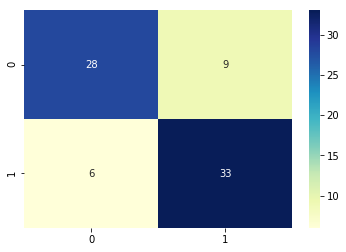

In [21]:
sns.heatmap(confusion_matrix(y_test, rfc_predict), cmap="YlGnBu", annot=True, fmt="d");

In [22]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        37
           1       0.79      0.85      0.81        39

   micro avg       0.80      0.80      0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [24]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, predict_test)))

RMSE: 0.3447024480558125


# Investigate

In [25]:
param_grid = {
    "n_estimators": [10, 20, 50, 100, 200, 500],
    "max_depth": [40, 50, 60, 90]
}
model2 = RandomForestClassifier()
gridcv = GridSearchCV(model2, param_grid=param_grid, n_jobs=4, verbose=2)
gridcv.fit(X, y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:   12.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 500], 'max_depth': [40, 50, 60, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [26]:
gridcv.best_score_

0.8283828382838284

In [27]:
gridcv.best_params_

{'max_depth': 50, 'n_estimators': 200}

In [28]:
df = pd.DataFrame(gridcv.cv_results_)
df.head()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.027503,0.002122,0.008833,0.005814,40,10,"{'max_depth': 40, 'n_estimators': 10}",0.772277,0.831683,0.821782,0.808581,0.025987,15,0.99505,1.0,0.990099,0.99505,0.004042
1,0.045975,0.000002,0.006166,0.001031,40,20,"{'max_depth': 40, 'n_estimators': 20}",0.801980,0.811881,0.752475,0.788779,0.025987,20,1.00000,1.0,0.995050,0.99835,0.002334
2,0.120070,0.010224,0.012511,0.001788,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.801980,0.831683,0.772277,0.801980,0.024252,18,1.00000,1.0,1.000000,1.00000,0.000000
3,0.232093,0.016358,0.020989,0.001633,40,100,"{'max_depth': 40, 'n_estimators': 100}",0.811881,0.831683,0.782178,0.808581,0.020345,15,1.00000,1.0,1.000000,1.00000,0.000000
4,0.446264,0.012380,0.040813,0.004872,40,200,"{'max_depth': 40, 'n_estimators': 200}",0.831683,0.851485,0.782178,0.821782,0.029148,4,1.00000,1.0,1.000000,1.00000,0.000000


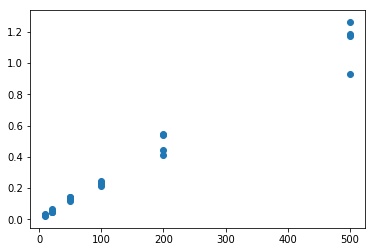

In [29]:
plt.scatter(df['param_n_estimators'], df['mean_fit_time'])

# 5. Conclusion

In [49]:
lm.coef_
pd.DataFrame(data=lm.coef_,index=X.columns,columns =['Coeffecients'] )

,Coeffecients
age,-0.001477
sex,-0.196171
cp,0.122671
trestbps,-0.002526
chol,-0.000500
fbs,0.074946
restecg,0.042176
thalach,0.002706
exang,-0.155022
oldpeak,-0.048421


In [ ]:
#chest pain type,the slope of the peak exercise ST segment and  fasting blood sugar are the main impact to heart disaster